In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  



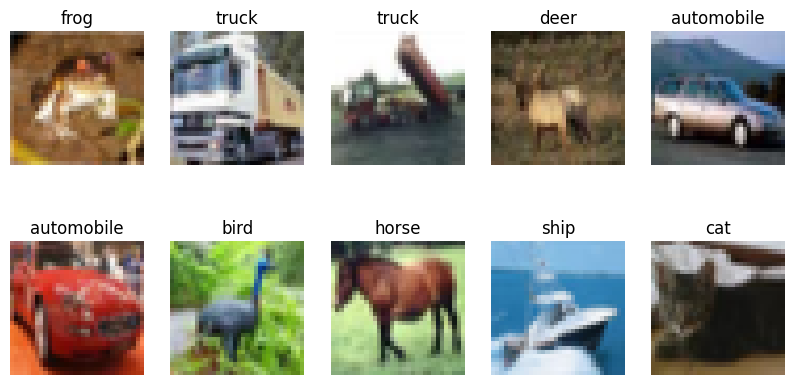

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].argmax()]) 
    plt.axis('off') 

plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

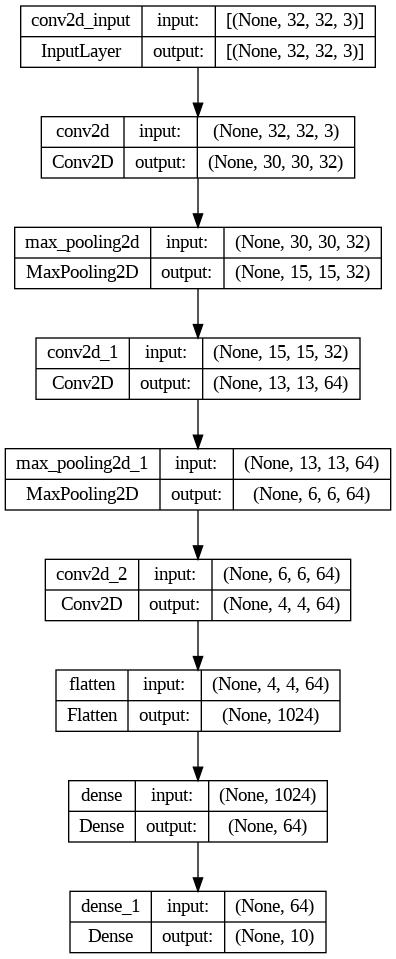

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = 'best_model.h5'

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1               
)


In [9]:
history=model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[model_checkpoint]  
)

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 1.6056 - accuracy: 0.4065
Epoch 1: val_accuracy improved from -inf to 0.51740, saving model to best_model.h5
1250/1250 [==============================] - 64s 50ms/step - loss: 1.6056 - accuracy: 0.4065 - val_loss: 1.3367 - val_accuracy: 0.5174
Epoch 2/10
   2/1250 [..............................] - ETA: 1:18 - loss: 1.2572 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1249/1250 [============================>.] - ETA: 0s - loss: 1.2545 - accuracy: 0.5519
Epoch 2: val_accuracy improved from 0.51740 to 0.57870, saving model to best_model.h5
1250/1250 [==============================] - 59s 47ms/step - loss: 1.2548 - accuracy: 0.5518 - val_loss: 1.2007 - val_accuracy: 0.5787
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 1.1043 - accuracy: 0.6107
Epoch 3: val_accuracy improved from 0.57870 to 0.63380, saving model to best_model.h5
1250/1250 [==============================] - 55s 44ms/step - loss: 1.1043 - accuracy: 0.6107 - val_loss: 1.0530 - val_accuracy: 0.6338
Epoch 4/10
1249/1250 [============================>.] - ETA: 0s - loss: 1.0124 - accuracy: 0.6443
Epoch 4: val_accuracy improved from 0.63380 to 0.63850, saving model to best_model.h5
1250/1250 [==============================] - 57s 46ms/step - loss: 1.0123 - accuracy: 0.6443 - val_loss: 1.0305 - val_accuracy: 0.6385
Epoch 5/10
1249/1250 [============================>.] 

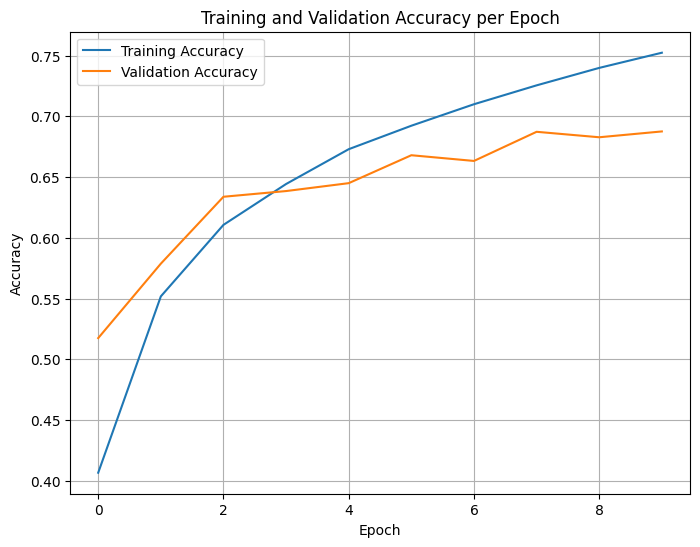

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy on test set: {test_acc}')


313/313 [==============================] - 4s 12ms/step - loss: 0.9621 - accuracy: 0.6774
Accuracy on test set: 0.6773999929428101


# **PARTIE TEST**

313/313 [==============================] - 6s 17ms/step - loss: 0.9621 - accuracy: 0.6774
Test Accuracy: 67.74%
Test Loss: 0.9621
313/313 [==============================] - 4s 14ms/step


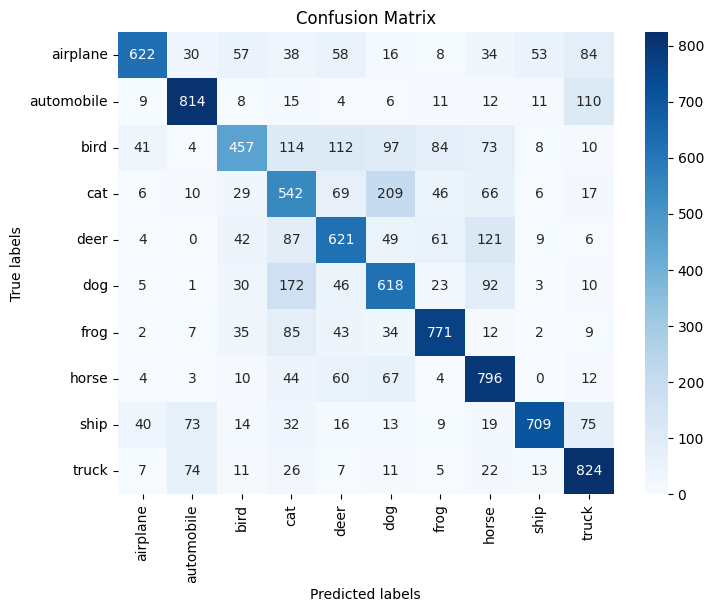

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.62      0.71      1000
  automobile       0.80      0.81      0.81      1000
        bird       0.66      0.46      0.54      1000
         cat       0.47      0.54      0.50      1000
        deer       0.60      0.62      0.61      1000
         dog       0.55      0.62      0.58      1000
        frog       0.75      0.77      0.76      1000
       horse       0.64      0.80      0.71      1000
        ship       0.87      0.71      0.78      1000
       truck       0.71      0.82      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0  
y_test = to_categorical(y_test)  

model = load_model('best_model.h5')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))
